In [1]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

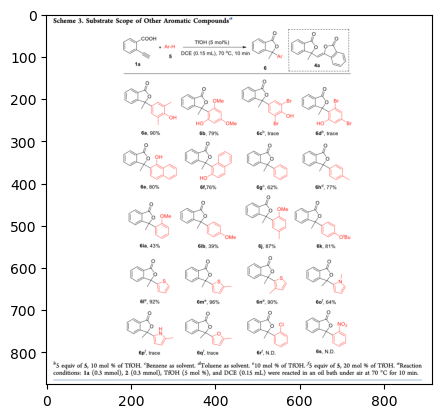

In [3]:
file_name = 'acs.joc.3c00760 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

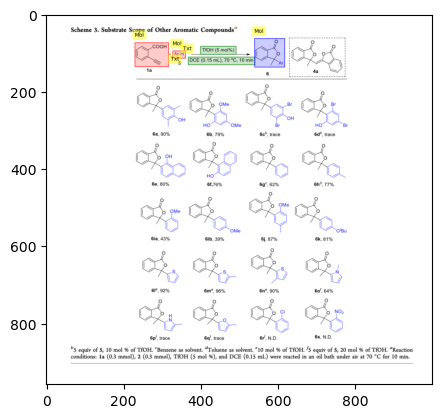

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'C#Cc1ccccc1C(=O)O': ['Ia'], 'CC1(c2ccc3ccccc3c2O)OC(=O)c2ccccc21': ['80%6', '60 ,'], 'Cc1cc(C2(C)OC(=O)c3ccccc32)cc(C)c1O': ['6a', '90%'], 'Cc1ccc(C2(C)OC(=O)c3ccccc32)[nH]1': ['6p', 'trace'], 'COc1ccccc1C1(C)OC(=O)c2ccccc21': ['43%', '6ia ,'], 'CC1(c2cccs2)OC(=O)c2ccccc21': ['61" , 92%'], '*': ['5'], 'COc1ccc(C2(C)OC(=O)c3ccccc32)cc1': ['6ib, 39%'], 'COc1cc(O)c(C2(C)OC(=O)c3ccccc32)c(OC)c1': ['6b, 79%'], 'CC1(c2c(O)ccc3ccccc23)OC(=O)c2ccccc21': ['6f,76%'], 'Cc1ccc(C2(C)OC(=O)c3ccccc32)s1': ['6m", 96%'], 'Cc1ccc(C2(C)OC(=O)c3ccccc32)o1': ['[', '6q', 'trace'], 'CC1(c2cc(Br)c(O)c(Br)c2)OC(=O)c2ccccc21': ['b', '6c', 'trace'], 'COc1ccc(C)cc1C1(C)OC(=O)c2ccccc21': ['6] , 87%'], 'Cc1ccsc1C1(C)OC(=O)c2ccccc21': ['6n"', '90%'], 'CC1(c2ccccc2Cl)OC(=O)c2ccccc21': ["6r'", 'N,D.'], 'CC1(c2ccccc2)OC(=O)c2ccccc21': ['6g', 'c', '62%6'], '*C1(C)OC(=O)c2ccccc21': ['6'], 'CC1(/C=C2\\OC(=O)c3ccccc32)OC(=O)c2ccccc21': ['4a'], 'CC(C)(C)Oc1ccc(C2(C)OC(=O)c3ccccc32)cc1': ['6k, 81%'], 'CC1(c2c(O)cc(Br)cc2Br

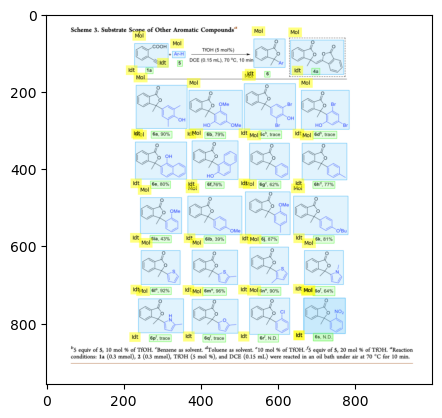

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

C#Cc1ccccc1C(=O)O


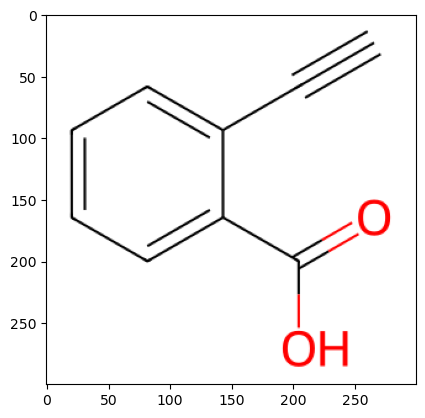

*


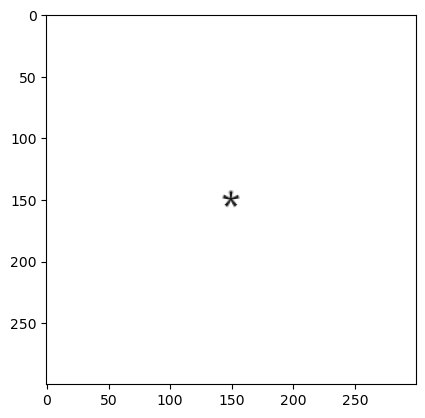

*C1(C)OC(=O)c2ccccc21


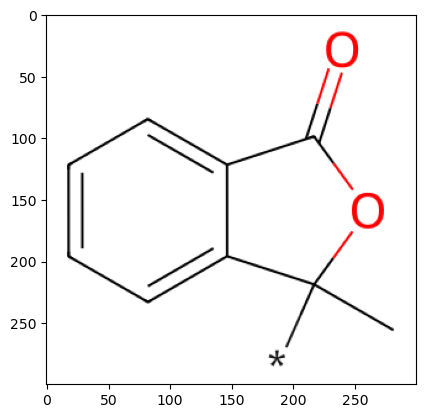

In [6]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [7]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 6a
C#Cc1ccccc1C(=O)O


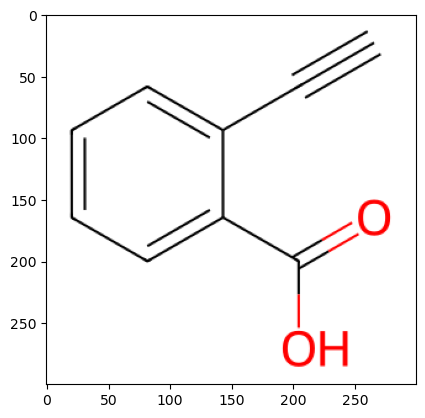

Cc1cccc(C)c1O


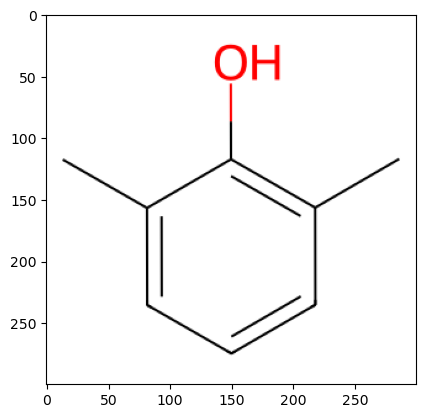

these are the predicted reactants corresponding the product with label 6p
C#Cc1ccccc1C(=O)O


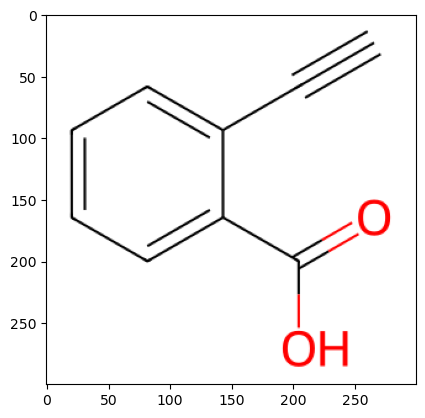

Cc1ccc[nH]1


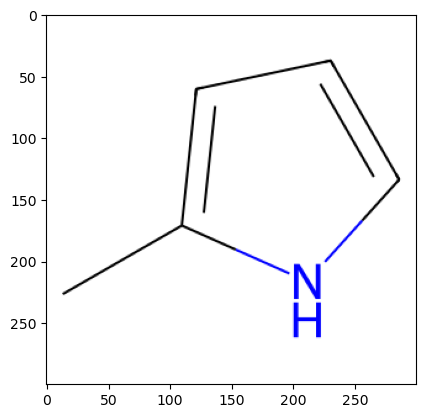

these are the predicted reactants corresponding the product with label 6ia ,
C#Cc1ccccc1C(=O)O


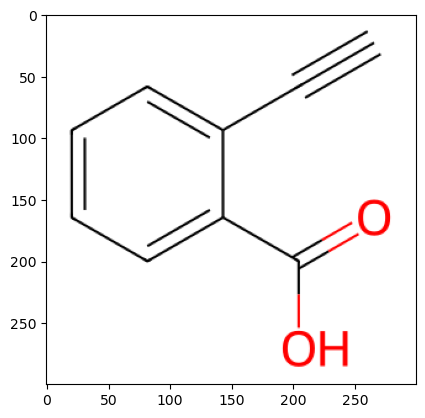

COc1ccccc1


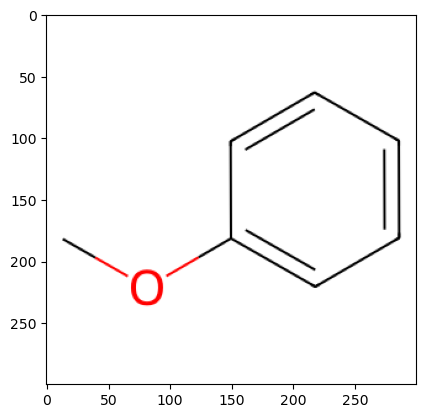

these are the predicted reactants corresponding the product with label 6ib, 39%
C#Cc1ccccc1C(=O)O


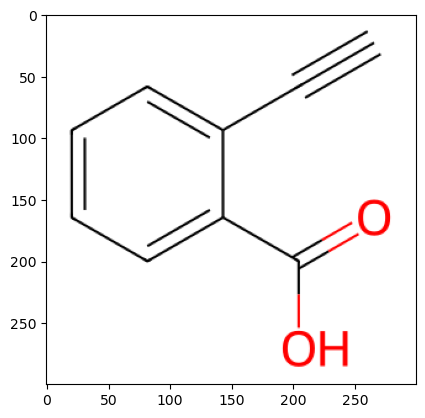

COc1ccccc1


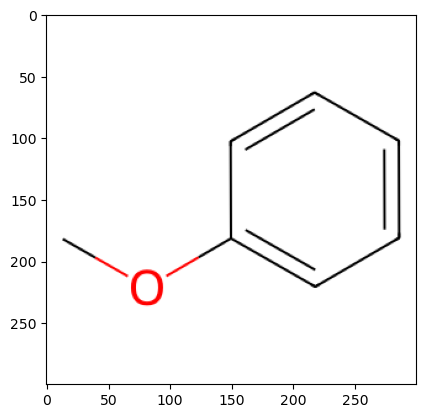

these are the predicted reactants corresponding the product with label 6b, 79%
C#Cc1ccccc1C(=O)O


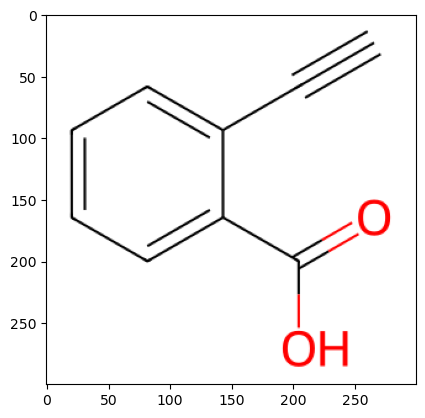

COc1cc(O)cc(OC)c1


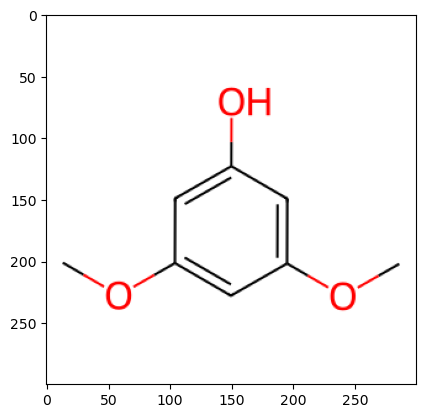

these are the predicted reactants corresponding the product with label 6f,76%
C#Cc1ccccc1C(=O)O


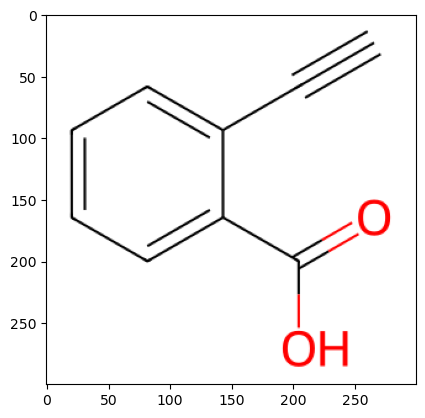

Oc1ccc2ccccc2c1


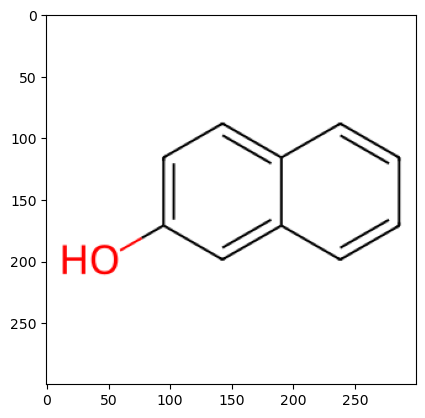

these are the predicted reactants corresponding the product with label 6m", 96%
C#Cc1ccccc1C(=O)O


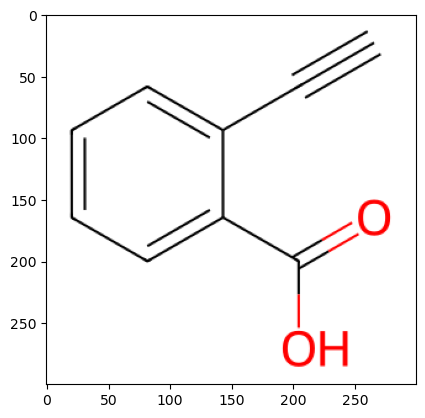

Cc1cccs1


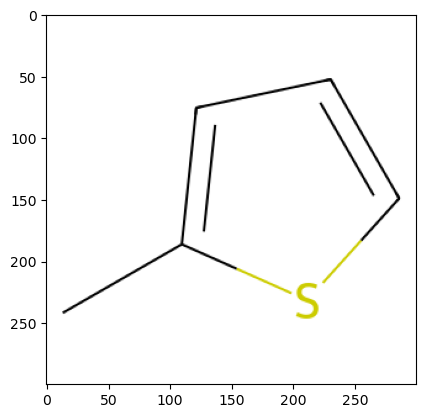

these are the predicted reactants corresponding the product with label 6q
C#Cc1ccccc1C(=O)O


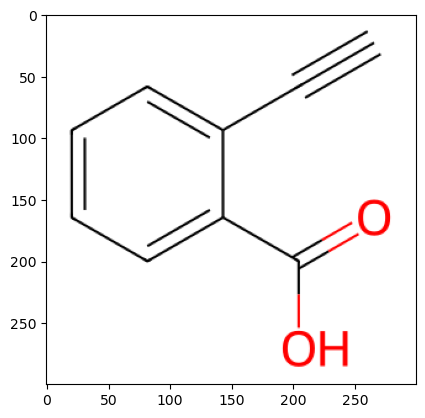

Cc1ccco1


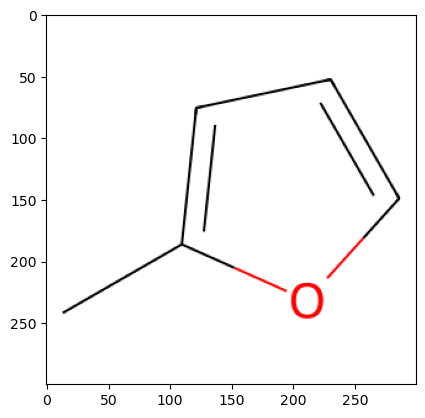

these are the predicted reactants corresponding the product with label 6c
C#Cc1ccccc1C(=O)O


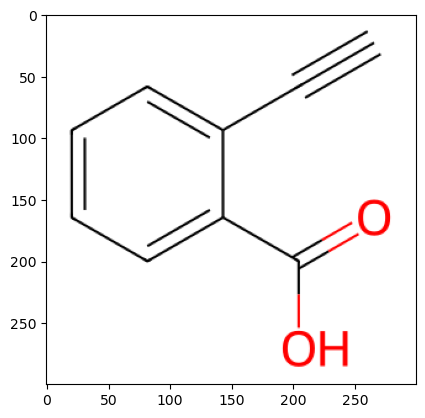

Oc1c(Br)cccc1Br


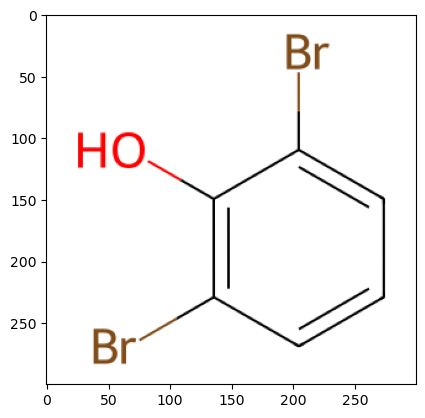

these are the predicted reactants corresponding the product with label 6n"
C#Cc1ccccc1C(=O)O


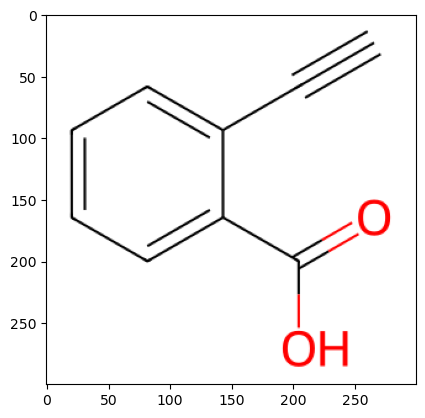

Cc1ccsc1


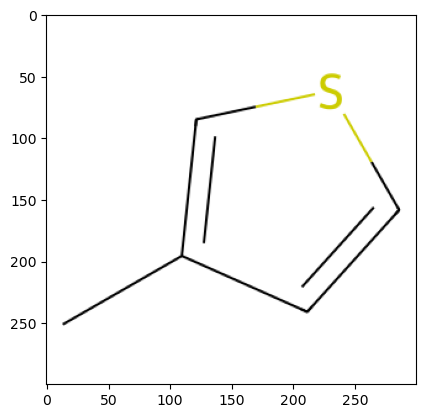

these are the predicted reactants corresponding the product with label 6r'
C#Cc1ccccc1C(=O)O


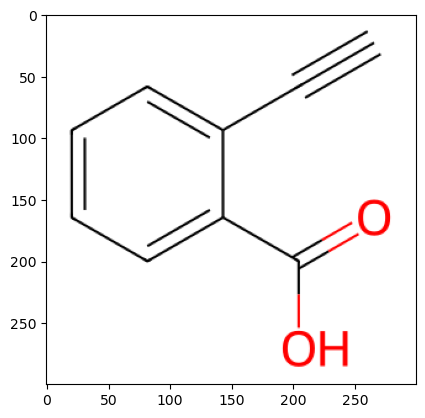

Clc1ccccc1


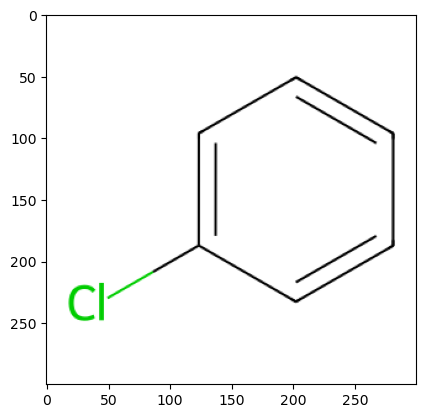

these are the predicted reactants corresponding the product with label 6g
C#Cc1ccccc1C(=O)O


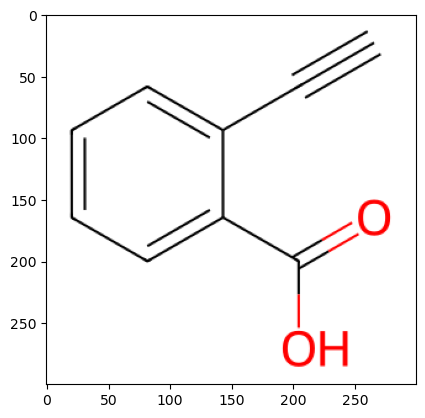

c1ccccc1


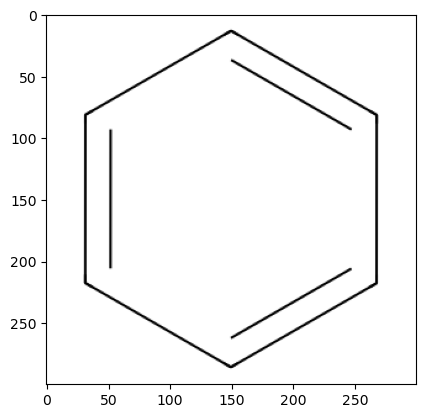

these are the predicted reactants corresponding the product with label 6k, 81%
C#Cc1ccccc1C(=O)O


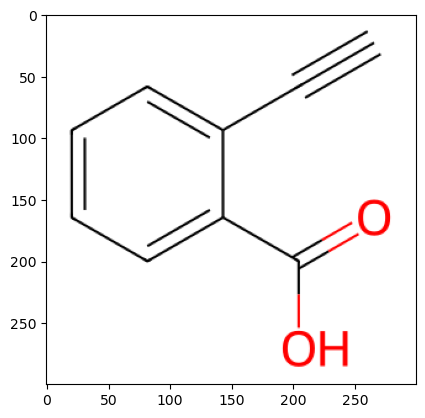

CC(C)(C)Oc1ccccc1


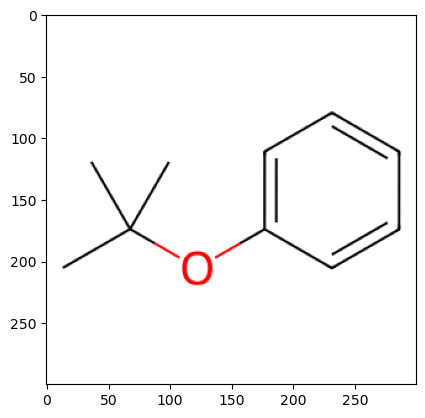

these are the predicted reactants corresponding the product with label 6db , trace
C#Cc1ccccc1C(=O)O


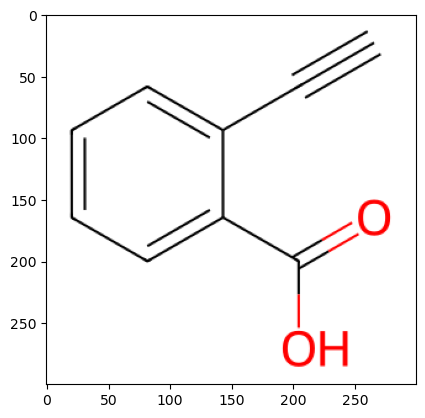

Oc1cc(Br)cc(Br)c1


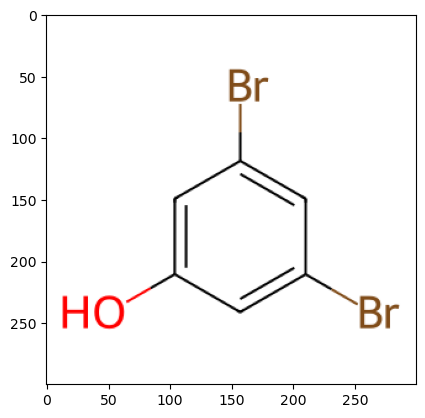

these are the predicted reactants corresponding the product with label 6o' , 649
C#Cc1ccccc1C(=O)O


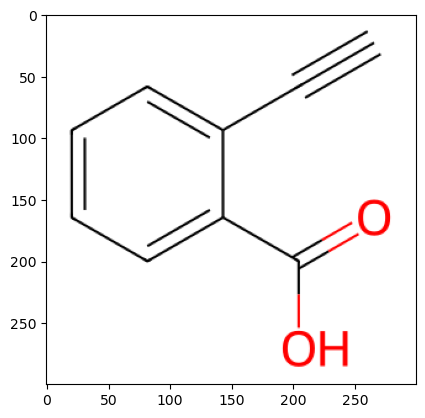

Cn1cccc1


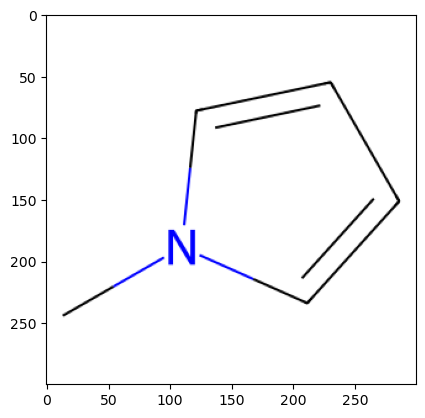

In [8]:
extracted_reactants = {}

for reactants, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

6a yes
6b yes
6c yes
6d yes
6e
6f yes
6g yes
6h
6ia yes
6ib yes
6j 
6k yes
6l
6m yes
6n yes
6o yes
6p yes
6q yes
6r yes
6s

precision 15/20 recall 15/15